# Amazon Product Data Analysis

## Dataset Source
Kaggle - Amazon Products Dataset

## Objective
The purpose of this project is to analyze Amazon product data to uncover insights 
related to product categories, pricing strategies, brand competition, and customer behavior.

# Load and Preview the Data
- Import necessary tolls
- Load dataset and use 'pandas.read-csv()' to display it.
- Confirm the loading with 'df.head()'


In [90]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [91]:
# Load dataset

df = pd.read_csv('data/amazon_product.csv')

# Review the dataset structure and information

In [92]:
# Display first few rows of the dataset
df.head()

,Unnamed: 0,asin,product_title,product_price,product_original_price,currency,product_star_rating,product_num_ratings,product_url,product_photo,...,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery,has_variations,product_availability,unit_price,unit_count
0,0,B0BQ118F2T,Moto G Play 2023 3-Day Battery Unlocked Made f...,$99.99,$169.99,USD,4.0,2929,https://www.amazon.com/dp/B0BQ118F2T,https://m.media-amazon.com/images/I/61K1Fz5Lxv...,...,False,False,True,False,6K+ bought in past month,"FREE delivery Tue, Aug 6",True,NaN,NaN,NaN
1,1,B0CTD47P22,"SAMSUNG Galaxy A15 5G (SM-156M/DSN), 128GB 6GB...",$149.74,$158.00,USD,4.2,135,https://www.amazon.com/dp/B0CTD47P22,https://m.media-amazon.com/images/I/51QhB2CfqS...,...,False,False,True,False,3K+ bought in past month,"FREE delivery Wed, Aug 7 Only 7 left in stock ...",False,Only 7 left in stock - order soon.,NaN,NaN
2,2,B0CHH6X6H2,Total by Verizon | Samsung Galaxy A03s | Locke...,$49.88,NaN,USD,3.9,205,https://www.amazon.com/dp/B0CHH6X6H2,https://m.media-amazon.com/images/I/812woqv69C...,...,False,False,True,False,2K+ bought in past month,"FREE delivery Tue, Aug 6",False,NaN,NaN,NaN
3,3,B0BZ9XNBRB,Google Pixel 7a - Unlocked Android Cell Phone ...,$335.00,$499.00,USD,4.3,2248,https://www.amazon.com/dp/B0BZ9XNBRB,https://m.media-amazon.com/images/I/61r7cCpQPl...,...,False,False,False,False,10K+ bought in past month,FREE delivery Aug 6 - 8,True,NaN,NaN,NaN
4,4,B0CN1QSH8Q,"SAMSUNG Galaxy A15 5G A Series Cell Phone, 128...",$199.99,NaN,USD,4.1,423,https://www.amazon.com/dp/B0CN1QSH8Q,https://m.media-amazon.com/images/I/61s0ZzwzSC...,...,False,False,True,True,3K+ bought in past month,"FREE delivery Tue, Aug 6",True,NaN,NaN,NaN


In [ ]:
print("\n===== COLUMN NAMES IN YOUR FILE =====")
for col in df.columns:
    print(col)


===== COLUMN NAMES IN YOUR FILE =====
Unnamed: 0
asin
product_title
product_price
product_original_price
currency
product_star_rating
product_num_ratings
product_url
product_photo
product_num_offers
product_minimum_offer_price
is_best_seller
is_amazon_choice
is_prime
climate_pledge_friendly
sales_volume
delivery
has_variations
product_availability
unit_price
unit_count


# 1. Product Performance
## "Which brand is the most popularover the last quater?"

brand
Samsung    5
Forever    3
Amazon     3
Apple      3
Moto       2
Name: count, dtype: int64


C:\Users\junio\AppData\Local\Temp\ipykernel_22508\3289904808.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')


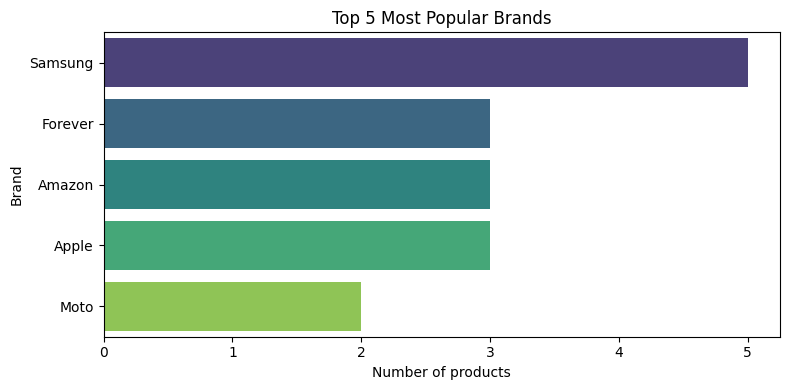

In [ ]:


# prefer real missing values
if any(c in df.columns for c in ['brand','manufacturer','product_brand']):
    col = [c for c in ['brand','manufacturer','product_brand'] if c in df.columns][0]
    df['brand'] = df[col].replace({None: np.nan}).astype(object)
else:
    def extract_brand(title):
        if pd.isna(title): return np.nan
        t = str(title).strip()
        t = re.sub(r'^[^A-Za-z0-9]+', '', t)
        t = re.sub(r'^(The|the)\s+', '', t)
        first = t.split()[0] if t.split() else ''
        first = first.strip(":,-|/()[]")
        return first if first else np.nan
    df['brand'] = df['product_title'].apply(extract_brand)

# normalize whitespace and unify case
df['brand'] = df['brand'].replace({'nan': np.nan, 'None': np.nan}).astype(object)
df['brand'] = df['brand'].where(df['brand'].notna(), np.nan)
df['brand'] = df['brand'].str.strip().str.title()  # optional

top_brands = df['brand'].dropna().value_counts().head(5)
print(top_brands)
if not top_brands.empty:

    # Visualization
    plt.figure(figsize=(8, max(4, 0.3 * len(top_brands))))
    sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')
    #sns.barplot(x=top_brands.values, y=top_brands.index)
    plt.xlabel('Number of products')
    plt.ylabel('Brand')
    plt.title('Top 5 Most Popular Brands')
    plt.tight_layout()
    plt.show()


# 2. Customer Satisfaction
## “Which products are receiving consistently low ratings or high return rates, and what are the top themes in customer complaints?”


===== Top 10 Low-Rated Products =====
                                        product_title  rating  num_reviews
42                                My Avatar Life City     1.8           12
62  Xbox Wireless Controller – Sky Cipher Special ...     2.6           12


C:\Users\junio\AppData\Local\Temp\ipykernel_22508\943184174.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


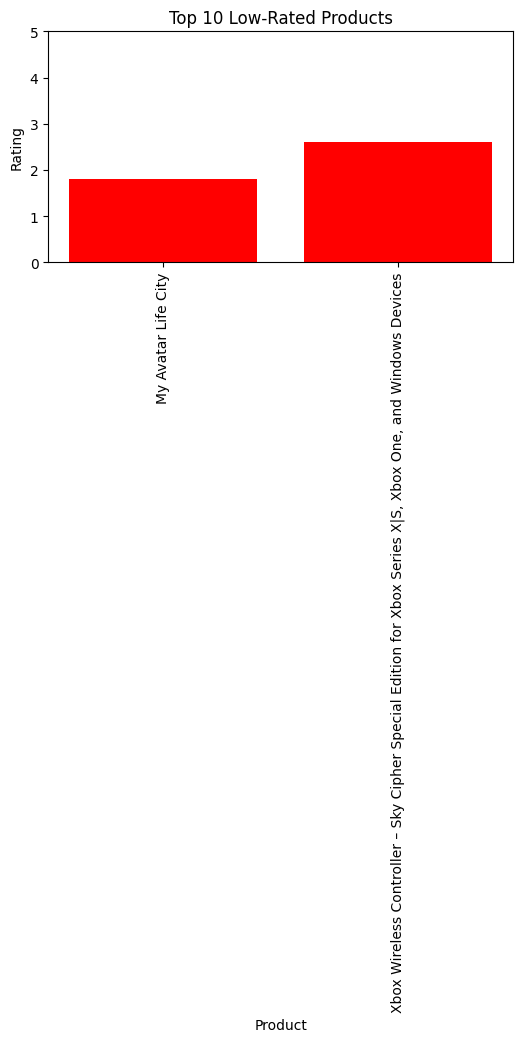


No review text column found, cannot extract complaint themes.


In [ ]:
df.rename(columns={
    "product_star_rating": "rating",
    "product_num_ratings": "num_reviews"
}, inplace=True)

# Convert to numeric
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df["num_reviews"] = pd.to_numeric(df["num_reviews"], errors="coerce")

# Low rated products
# Define low rating threshold (e.g., 3 stars or below)
low_rating_threshold = 3

low_rated = df[df["rating"] <= low_rating_threshold]

# Sort by number of reviews to focus on products with significant feedback
low_rated_top = low_rated.sort_values(by="num_reviews", ascending=False).head(10)

print("\n===== Top 10 Low-Rated Products =====")
print(low_rated_top[["product_title", "rating", "num_reviews"]])

# Visualization
plt.figure(figsize=(6,3))
plt.bar(low_rated_top["product_title"], low_rated_top["rating"], color="red")
plt.xticks(rotation=90)
plt.ylim(0, 5)
plt.title("Top 10 Low-Rated Products")
plt.ylabel("Rating")
plt.xlabel("Product")
plt.tight_layout()
plt.show()


# Top customer complaints (if text exists)
# Replace 'review_text' with the actual column containing review text if available
if "review_text" in df.columns:
    from collections import Counter
    import re

    # Combine all reviews for low-rated products
    all_reviews = " ".join(df.loc[df["rating"] <= low_rating_threshold, "review_text"].dropna())

    # Simple word frequency (ignoring common words)
    stop_words = set(["the", "and", "is", "it", "to", "for", "this", "a", "of", "with"])
    words = re.findall(r"\b\w+\b", all_reviews.lower())
    words = [w for w in words if w not in stop_words]

    word_freq = Counter(words)
    top_complaints = word_freq.most_common(10)

    print("\n===== Top Customer Complaint Themes =====")
    for word, count in top_complaints:
        print(f"{word}: {count}")
else:
    print("\nNo review text column found, cannot extract complaint themes.")

# 3. Product Popularity
## “Which products are the most popular among our customers?”

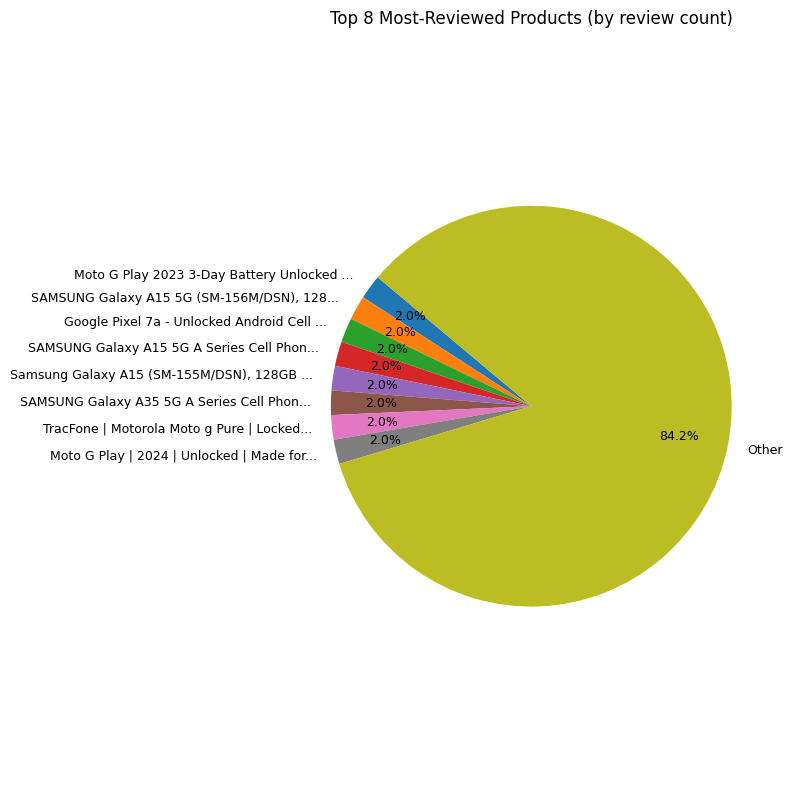

In [ ]:

# Pie chart of most-reviewed products
top_n = 8

# Ensure numeric and drop NaNs
rating_cols = [col for col in df.columns if 'rating' in col.lower()]
if not rating_cols:
    raise KeyError("No column containing 'rating' found in df")
ratings_col = rating_cols[0]

df_r = df[[ 'asin', 'product_title', ratings_col ]].copy()
df_r[ratings_col] = pd.to_numeric(df_r[ratings_col], errors='coerce').fillna(0).astype(int)

total_reviews = df_r[ratings_col].sum()
if total_reviews == 0:
    print("No review counts available to plot.")
else:
    top = df_r.nlargest(top_n, ratings_col)
    top_sum = top[ratings_col].sum()
    other_sum = max(0, total_reviews - top_sum)

    labels = [
        (t[:40] + '...') if len(t) > 40 else t
        for t in top['product_title'].astype(str)
    ]
    sizes = top[ratings_col].tolist()
    if other_sum:
        labels.append('Other')
        sizes.append(other_sum)

    # Visualization
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.75, textprops={'fontsize': 9})
    plt.title(f"Top {top_n} Most-Reviewed Products (by review count)")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()